In [204]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [190]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


In [192]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [193]:
# Step 1: Load and explore the data
data = pd.read_csv(r'C:\Users\HP\Downloads\archive (11)\diabetes.csv')


In [194]:
data.head()  # Display the first few rows of the dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [195]:
data.describe()  # Summary statistics of the dataset



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [196]:
data.isnull().sum()
# Check for missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [197]:
correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


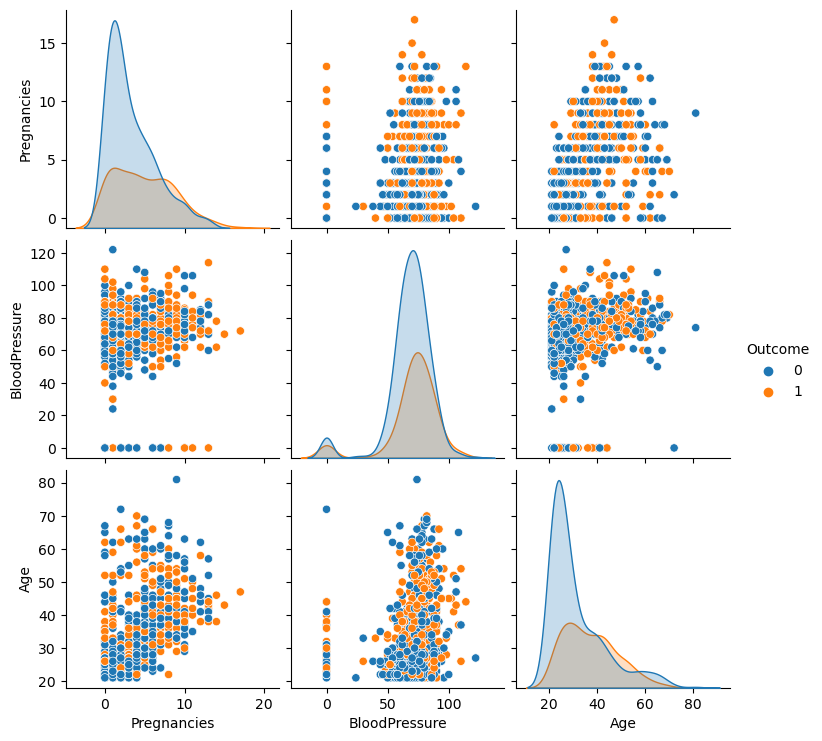

In [198]:
# Visualize the relationship between features and target variable
sns.pairplot(data, vars=['Pregnancies', 'BloodPressure', 'Age'], hue='Outcome')
plt.show()

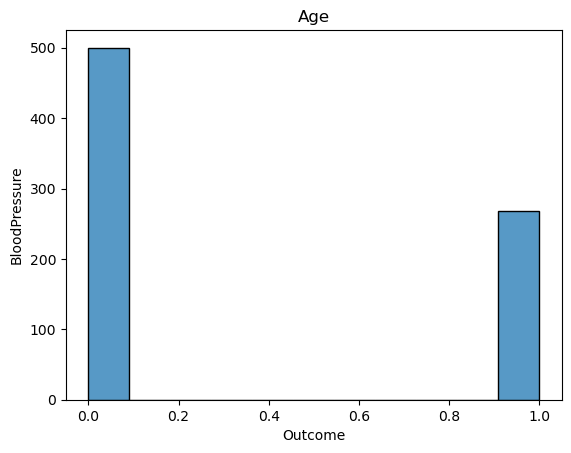

In [199]:
# Visualize the distribution of the target variable
sns.histplot(data['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('BloodPressure')
plt.title('Age')
plt.show()

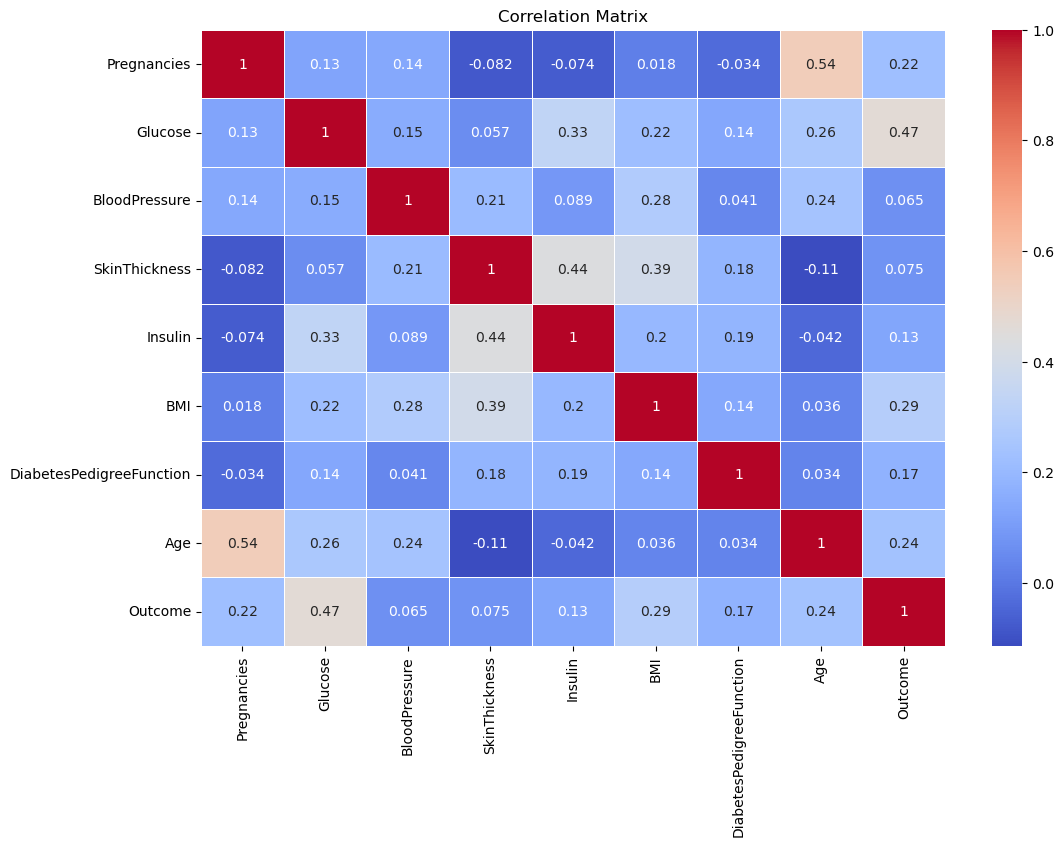

In [200]:
  # Data Visualization - Correlation Matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [201]:

X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable


In [202]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [203]:
data.shape

(768, 9)

In [205]:
# Preprocess the training data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

# Preprocess the testing data
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

In [206]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [207]:
# Create a pipeline for preprocessing
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [208]:
# Define the machine learning models
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

In [209]:

for name, model in models:
    print(f"Model: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Model Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("--------------------------")
    

Model: Decision Tree
Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091
F1-Score: 0.6842105263157895
Confusion Matrix:
[[79 20]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

--------------------------
Model: Random Forest
Accuracy: 0.7272727272727273
Precision: 0.6140350877192983
Recall: 0.6363636363636364
F1-Score: 0.625
Confusion Matrix:
[[77 22]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71      

In [210]:

# Step 3: Create a pipeline for each model


# Decision Tree
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

# Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# Support Vector Machine
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# K-Nearest Neighbors
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Naive Bayes
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Gradient Boosting
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

In [227]:

# Step 4: Define hyperparameters for each model

dt_hyperparameters = {
    'dt__max_depth': [None, 5, 10],
    'dt__min_samples_split': [2, 5, 10]
}

rf_hyperparameters = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

svm_hyperparameters = {
    'svm__C': [0.1, 1.0, 10.0],
    'svm__kernel': ['linear', 'rbf']
}

knn_hyperparameters = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

nb_hyperparameters = {}

gb_hyperparameters = {
    'gb__learning_rate': [0.1, 0.5, 1.0],
    'gb__n_estimators': [100, 200, 500]
}

In [219]:
# Step 5: Perform hyperparameter tuning for each model
dt_grid = GridSearchCV(dt_pipeline, dt_hyperparameters, cv=5)
dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [None, 5, 10],
                         'dt__min_samples_split': [2, 5, 10]})

In [221]:

rf_grid = GridSearchCV(rf_pipeline, rf_hyperparameters, cv=5)
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 500]})

In [222]:

# Step 5: Perform hyperparameter tuning for each model

svm_grid = GridSearchCV(svm_pipeline, svm_hyperparameters, cv=5)
svm_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1.0, 10.0],
                         'svm__kernel': ['linear', 'rbf']})

In [223]:
knn_grid = GridSearchCV(knn_pipeline, knn_hyperparameters, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']})

In [224]:
nb_grid = GridSearchCV(nb_pipeline, nb_hyperparameters, cv=5)
nb_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nb', GaussianNB())]),
             param_grid={})

In [216]:


gb_grid = GridSearchCV(gb_pipeline, gb_hyperparameters, cv=5)
gb_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gb', GradientBoostingClassifier())]),
             param_grid={'gb__learning_rate': [0.1, 0.5, 1.0],
                         'gb__n_estimators': [100, 200, 500]})

In [217]:
# Step 6: Evaluate models

dt_predictions = dt_grid.predict(X_test)
rf_predictions = rf_grid.predict(X_test)
svm_predictions = svm_grid.predict(X_test)
knn_predictions = knn_grid.predict(X_test)
nb_predictions = nb_grid.predict(X_test)
gb_predictions = gb_grid.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)


print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)




Decision Tree Accuracy: 0.7987012987012987
Random Forest Accuracy: 0.7597402597402597
Support Vector Machine Accuracy: 0.7337662337662337
K-Nearest Neighbors Accuracy: 0.6948051948051948
Naive Bayes Accuracy: 0.7662337662337663
Gradient Boosting Accuracy: 0.7467532467532467


In [218]:
# Choose the best performing model based on the evaluation metrics
models = [
    (dt_accuracy, "Decision Tree Regression"),
    (rf_accuracy , "Random Forest Regression"),
    (svm_accuracy, "Support Vector Regression"),
    (knn_accuracy,"K-Nearest Neighbors Regression"),
    (nb_accuracy, "GNaive Bayes"),
    (gb_accuracy,"Gradient Boosting Accuracy")
]

best_model = max(models, key=lambda x: x[0])  # Selecting the model with the lowest accuracy

# Print information about the best-performing model
print("Best Performing Model:")
print("Model:", best_model[1])
print("Accuracy:", best_model[0])

Best Performing Model:
Model: Decision Tree Regression
Accuracy: 0.7987012987012987
